In [91]:
import pandas as pd
from numpy import mean
from numpy import std
from numpy.random import randn
from numpy.random import seed
from numpy import cov
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

Ejecutar primero código dataset_fecha_consumos_reducido.ipynb

In [75]:
df = pd.read_csv('../data/read_delta_day.csv', sep = ',')

In [53]:
df.head(5)

,day_of_year,READINGINTEGER,DELTAINTEGER
0,2019-02-01,531935.429534,24.616272
1,2019-02-02,532960.298180,16.624317
2,2019-02-03,533147.705400,17.320204
3,2019-02-04,533192.886830,22.657334
4,2019-02-05,533832.163550,18.684204


## Correlación entre variables

Fuente: https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables/ Jason Brownlee PhD

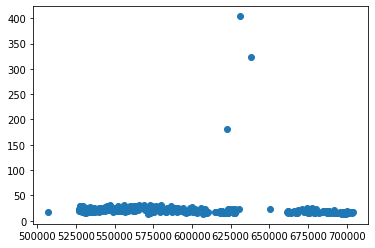

In [61]:
#¿Variables relacionadas?

pyplot.scatter(df['READINGINTEGER'], df['DELTAINTEGER'])
pyplot.show()

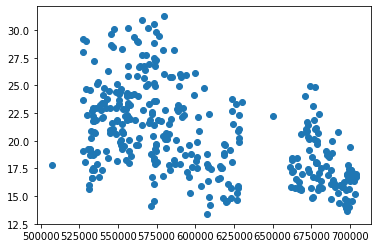

In [78]:
df = df[df['DELTAINTEGER'] < 100] 
pyplot.scatter(df['READINGINTEGER'], df['DELTAINTEGER'])
pyplot.show()
#No veo absolutamente nada...

In [63]:
#Covarianzas
#cov(X, Y) = (sum (x - mean(X)) * (y - mean(Y)) ) * 1/(n-1)
covariance = cov(df['READINGINTEGER'], df['DELTAINTEGER'])
print(covariance)

[[ 3.24970537e+09 -1.18593274e+05]
 [-1.18593274e+05  1.60034347e+01]]


La covarianza entre las dos variables es 3.24970537e+09. Al ser positiva, se sugiere que las variables cambian en la misma dirección. El problema de la covarianza como herramienta estadística es su baja interpretabilidad. Por ello se procede a emplear el coeficiente de correlación de Pearson.

#### Pearson

El coeficiente de correlación de Pearson se puede emplear para sintetizar la fuerza de una relación lineal entre dos variables. Se calcula como la covarianza de dos variables dividida por el producto de su desviación estándar. Es la normalización de la covarianza entre dos variables para dar una puntuación interpretable.

El uso de la media y la desviación estándar en el cálculo sugiere la necesidad de que las dos variables tengan una distribución normal o similar.

El coeficiente devuelve un valor entre -1 y 1 que representa los límites de correlación; de una correlación completamente negativa a una correlación completamente positiva. Un valor de 0 significa que no hay correlación. El valor debe interpretarse, donde a menudo un valor por debajo de -0,5 o por encima de 0,5 indica una correlación notable, y los valores por debajo de esos valores sugieren una correlación baja.

Text(0.5, 0, 'READINGINTEGER')

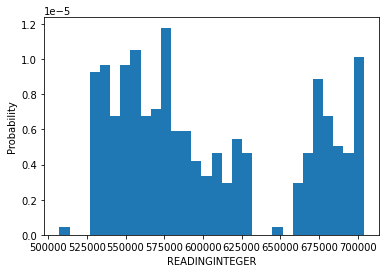

In [64]:
pyplot.hist(df['READINGINTEGER'], density=True, bins=30)  #Density = False would make counts
pyplot.ylabel('Probability')
pyplot.xlabel('READINGINTEGER')

Text(0.5, 0, 'DELTAINTEGER')

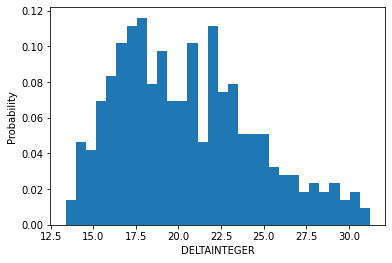

In [65]:
pyplot.hist(df['DELTAINTEGER'], density=True, bins=30)  #Density = False would make counts
pyplot.ylabel('Probability')
pyplot.xlabel('DELTAINTEGER')

In [66]:
#Pearson's correlation coefficient = covariance(X, Y) / (stdv(X) * stdv(Y))
corr_pe, _ = pearsonr(df['READINGINTEGER'], df['DELTAINTEGER'])
print('Pearsons correlation: %.3f' % corr_pe)

Pearsons correlation: -0.520


#### Spearman

Dos variables pueden estar relacionadas por una relación no lineal, de modo que la relación sea más fuerte o más débil a lo largo de la distribución de las variables.

Además, las dos variables que se consideran **pueden tener una distribución no gaussiana**.

El coeficiente de correlación de Spearman se puede utilizar para representar la fuerza entre dos muestras de datos. También se puede utilizar si existe una relación lineal entre las variables, pero su fuerza es ligeramente menor.

Los valores están entre -1 y 1 para variables perfectamente correlacionadas negativamente y perfectamente correlacionadas positivamente, respectivamente.

Si no se está seguro de la distribución y las posibles relaciones entre dos variables, el coeficiente de correlación de Spearman es una buena opcion como herramienta para usar.

In [67]:
#Spearman's correlation coefficient = covariance(rank(X), rank(Y)) / (stdv(rank(X))
corr_sp, _ = spearmanr(df['READINGINTEGER'], df['DELTAINTEGER'])
print('Spearmans correlation: %.3f' % corr_sp)

Spearmans correlation: -0.520


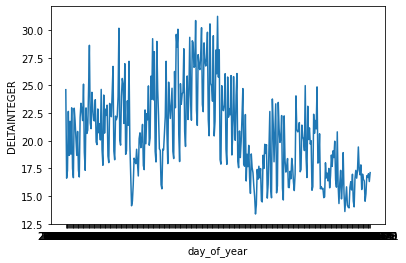

In [79]:
pyplot.plot(df['day_of_year'], df['DELTAINTEGER'])
pyplot.ylabel('DELTAINTEGER')
pyplot.xlabel('day_of_year')
pyplot.show()

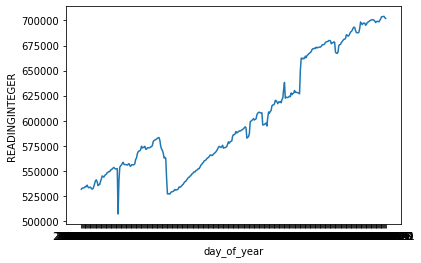

In [77]:
pyplot.plot(df['day_of_year'], df['READINGINTEGER'])
pyplot.ylabel('READINGINTEGER')
pyplot.xlabel('day_of_year')
pyplot.show()

## Autocorrelación y Autocorrelación parcial

Fuente: https://machinelearningmastery.com/gentle-introduction-autocorrelation-partial-autocorrelation/ Jason Brownlee PhD

Los gráficos de autocorrelación y de autocorrelación parcial se utilizan mucho en el análisis de series temporales.

Estos son diagramas resumen gráficamente la fuerza de una relación con una observación en una serie temporal con observaciones en variables de tiempo antiguas.

In [84]:
df2 = pd.read_csv('../data/read_delta_day.csv', header = 0, index_col = 0, sep = ',')
df2 = df2[df2['DELTAINTEGER'] < 100] 
read_date = df2.drop(labels = ['DELTAINTEGER'], axis=1)
delta_date = df2.drop(labels = ['READINGINTEGER'], axis=1)

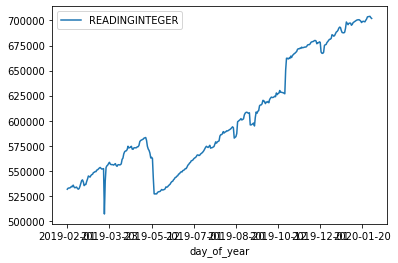

In [85]:
read_date.plot()
pyplot.show()

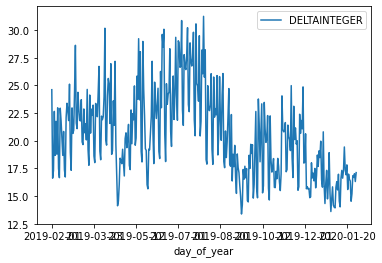

In [86]:
delta_date.plot()
pyplot.show()

La correlación estadística indica cuán fuertemente relacionadas están dos variables. 

Se puede calcular la correlación de observaciones de series temporales con observaciones con pasos anteriores en el tiempo, llamados "lags". Debido a que la correlación de las observaciones de la serie temporal se calcula con valores de la misma serie en momentos anteriores, esto se denomina serial correlation o autocorrelación. 

Una gráfica de autocorrelación de una serie de tiempo por retraso se denomina **A**uto**C**orrelation **F**unction, ACF. Esta gráfica a veces se denomina correlograma o gráfica de autocorrelación. 

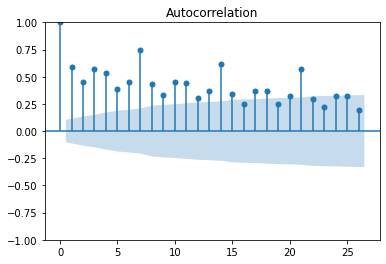

In [88]:
plot_acf(delta_date)
pyplot.show()

Se crea un gráfico 2D que muestra el valor de retraso a lo largo del eje x y la correlación en el eje y entre -1 y 1. 

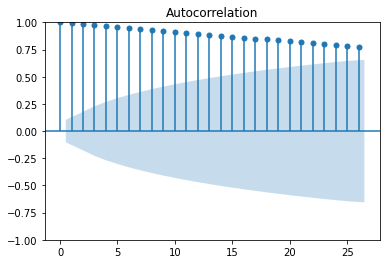

In [89]:
plot_acf(read_date)
pyplot.show()

La autocorrelación para una observación y una observación en un paso de tiempo anterior se compone tanto de la correlación directa como de las correlaciones indirectas. Estas correlaciones indirectas son una función lineal de la correlación de la observación, con observaciones en pasos de tiempo intermedios.

En el siguiente paso se calcula y traza una función de autocorrelación parcial para los primeros 100 lags en DELTAINTEGER diarios utilizando plot_pacf(). 

C:\Python3.10\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


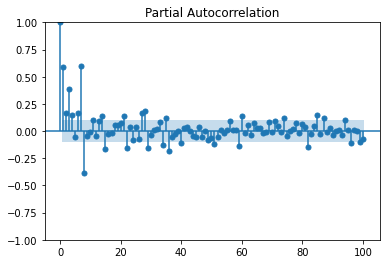

In [97]:
plot_pacf(delta_date, lags = 100)
pyplot.show()